In [1]:
import Ab as ab
import datetime as dt
import pandas as pd
sd = dt.datetime(2002,1,1)
ed = dt.datetime(2023,3,14)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ',sd,ed+dt.timedelta(days=1))

qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD',sd,ed+dt.timedelta(days=1))

tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ',sd,ed+dt.timedelta(days=1))

spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY',sd,ed+dt.timedelta(days=1))

ticker = tqqq

naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')

ndxa200r = ab.StockData('NDXA200R')
ndxa200r.get_data_from_csv('data/NDXA200R.csv')


spxa200r = ab.StockData('SPXA200R')
spxa200r.get_data_from_csv('data/SPXA200R.csv')
indicator = naa200r



GPU acceleration is available
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
test_start = dt.datetime(2010,4,21)
test_end = dt.datetime(2017,4,21)


In [3]:
#buy and hold
import time
bah = ab.BuyAndHold(ticker)
#time the execution of the strategy
start_time = time.time()
bah.run_strategy(ticker,test_start,test_end)
print("--- %s seconds ---" % (time.time() - start_time))
bah.trades

--- 0.0008502006530761719 seconds ---


,Signal
Date,
2010-04-21,1
2017-04-21,-1


In [4]:

bah_bt = ab.BackTest()
start_time = time.time()
bah_bt.run_backtest(bah,ticker,test_start,test_end)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.5477108955383301 seconds ---



<Ab.StockData object at 0x7fd24c0bc8e0>: 
cumulative return      : 1036.90%
compound anual return  : 26.3495% 
max_drawdown           : -44.54%
sharp_ratio            : 5.94%
average of daily return: 0.1889%
std of daily return    : 3.1822%
number of trades       : 2,
trading days           : 2557,
Betting Average        : 100.00%
Gain Average           : 1036.90%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        


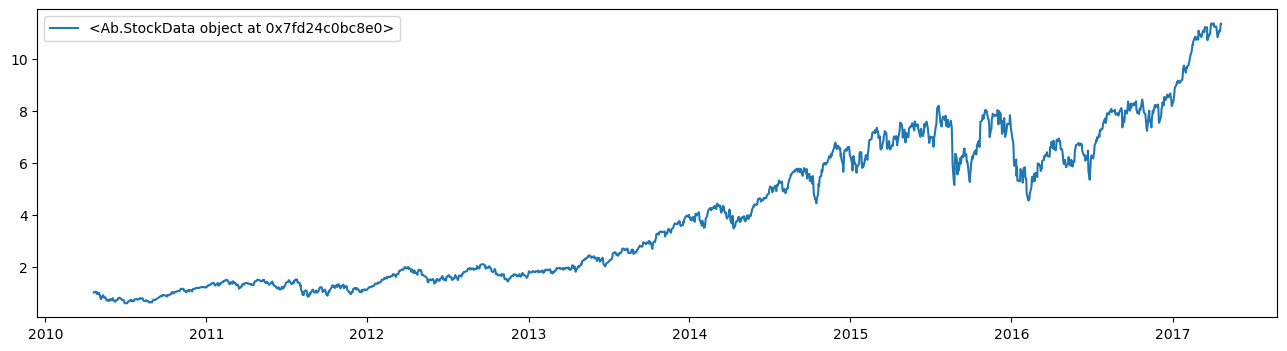

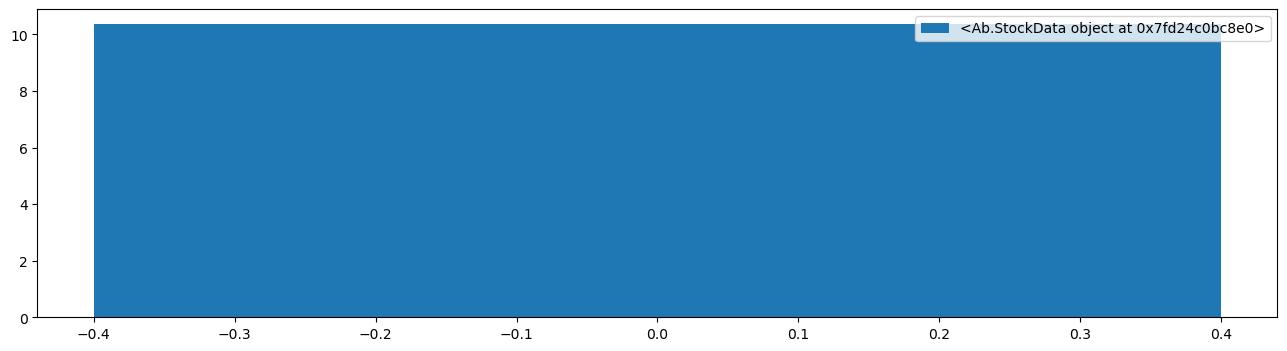

In [5]:

bah_bt.plot_balance()
bah_bt.plot_records()
bah_bt.performance_summary()

In [6]:
bah_bt.trade_records

,Buy Date,Sell Date,Ticker,Quant,Buy Price,Sell Price,Profit,Profit %
0,2010-04-21,2017-04-21 00:00:00,TQQQ,1.544526,0.647448,7.360833,10.368995,10.368995


In [7]:
stg = ab.Threshold('NAA200R')
stg.run_strategy(naa200r, start_date=test_start, end_date=test_end)

#stg = ab.MAThreshold('NAA200R',21, 1,1)
#stg.run_strategy(naa200r, test_start, test_end)

#stg = ab.MACross('MaCross',50,200)
#stg.run_strategy(naa200r, test_start, test_end)


In [8]:
stg.trades.loc[stg.trades['Signal'] !=0]

,Signal
Date,
2010-04-21,1.0
2010-04-22,1.0
2010-04-23,1.0
2010-04-26,1.0
2010-04-27,1.0
...,...
2017-04-03,1.0
2017-04-04,1.0
2017-04-11,1.0


In [9]:
naa200r_bt_weekly = ab.BackTest()
naa200r_bt_weekly.run_backtest(stg, ticker,test_start,test_end, True,True)



NAA200R 15/30 MA 20: 
cumulative return      : 830.42%
compound anual return  : 23.5748% 
max_drawdown           : -43.09%
sharp_ratio            : 5.96%
average of daily return: 0.1652%
std of daily return    : 2.7699%
number of trades       : 16,
trading days           : 2557,
Betting Average        : 46.67%
Gain Average           : 82.91%
Loss Average           : -9.30%
Risk Reward Ratio      : 8.91
Gain STD               : 134.76%
Loss STD               : 10.32%
        


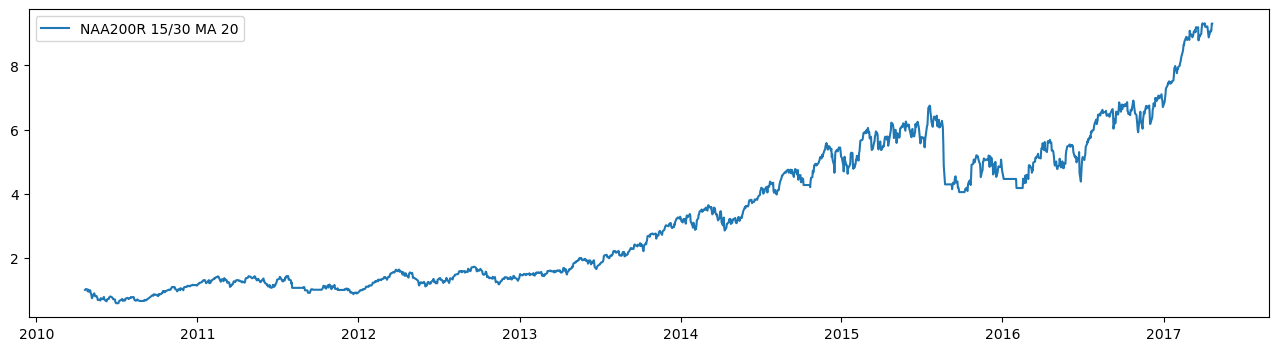

In [10]:
import matplotlib.pyplot as plt
naa200r_bt_weekly.plot_balance()
naa200r_bt_weekly.performance_summary()

plt.savefig('data/{}_naa200r_bt_weekly_{}-{}.png'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_weekly.trade_records.to_csv('data/{}_naa200r_bt_weekly_{}-{}.csv'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))




,Buy Date,Sell Date,Ticker,Quant,Buy Price,Sell Price,Profit,Profit %
0,2010-04-21,2010-08-23 00:00:00,TQQQ,1.544526,0.647448,0.425729,-0.342451,-0.342451
1,2010-09-02,2011-08-04 00:00:00,TQQQ,1.474878,0.445833,0.722708,0.408357,0.621028
2,2011-08-29,2011-09-02 00:00:00,TQQQ,1.520009,0.701250,0.650417,-0.077267,-0.072489
3,2011-09-07,2011-09-09 00:00:00,TQQQ,1.413394,0.699479,0.644375,-0.077884,-0.078779
4,2011-09-13,2011-09-20 00:00:00,TQQQ,1.311423,0.694479,0.768125,0.096581,0.106045
5,2011-10-10,2011-11-09 00:00:00,TQQQ,1.367618,0.736563,0.758438,0.029917,0.029699
6,2011-11-11,2011-11-16 00:00:00,TQQQ,1.300292,0.797708,0.769479,-0.036706,-0.035388
7,2011-11-30,2011-12-14 00:00:00,TQQQ,1.372768,0.728854,0.670417,-0.080220,-0.080177
8,2011-12-15,2011-12-19 00:00:00,TQQQ,1.383518,0.665208,0.654896,-0.014267,-0.015502
9,2011-12-20,2014-10-07 00:00:00,TQQQ,1.270735,0.713021,3.361250,3.365196,3.714097


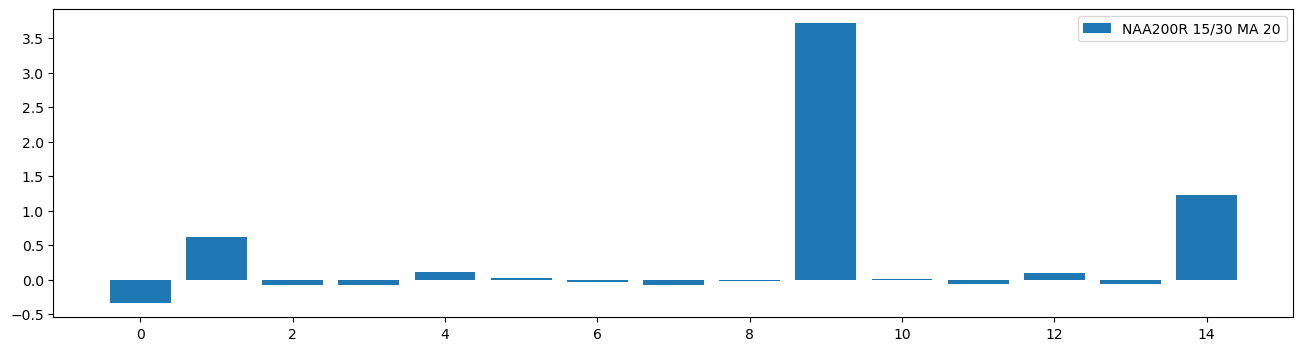

In [11]:
naa200r_bt_weekly.plot_records()
naa200r_bt_weekly.trade_records

In [12]:
naa200r_bt_daily = ab.BackTest()
naa200r_bt_daily.run_backtest(stg, ticker, test_start,test_end)



NAA200R 15/30 MA 20: 
cumulative return      : 830.42%
compound anual return  : 23.5748% 
max_drawdown           : -43.09%
sharp_ratio            : 5.96%
average of daily return: 0.1652%
std of daily return    : 2.7699%
number of trades       : 16,
trading days           : 2557,
Betting Average        : 46.67%
Gain Average           : 82.91%
Loss Average           : -9.30%
Risk Reward Ratio      : 8.91
Gain STD               : 134.76%
Loss STD               : 10.32%
        


<Figure size 640x480 with 0 Axes>

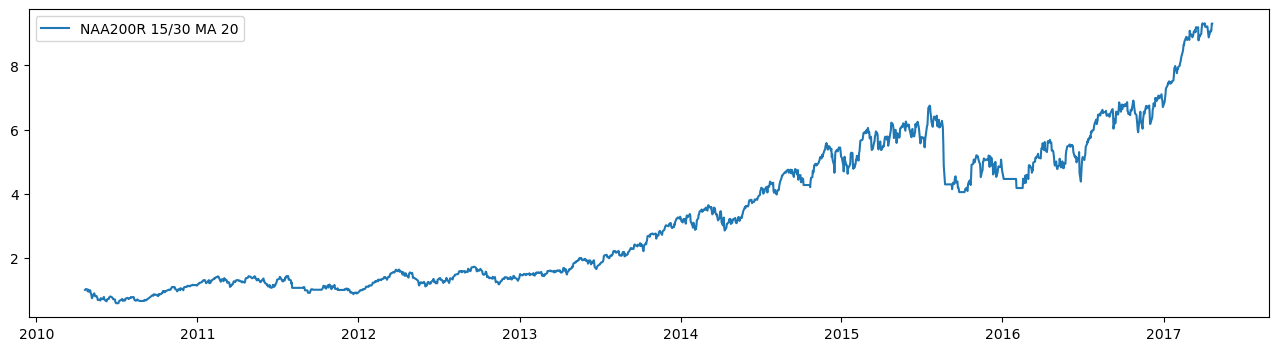

In [14]:
import matplotlib.pyplot as plt
plt.savefig('data/{}_naa200r_bt_daily_{}-{}.png'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_daily.trade_records.to_csv('data/{}_naa200r_15-30-MA20-daily_{}-{}.csv'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_daily.performance_summary()
naa200r_bt_daily.plot_balance()

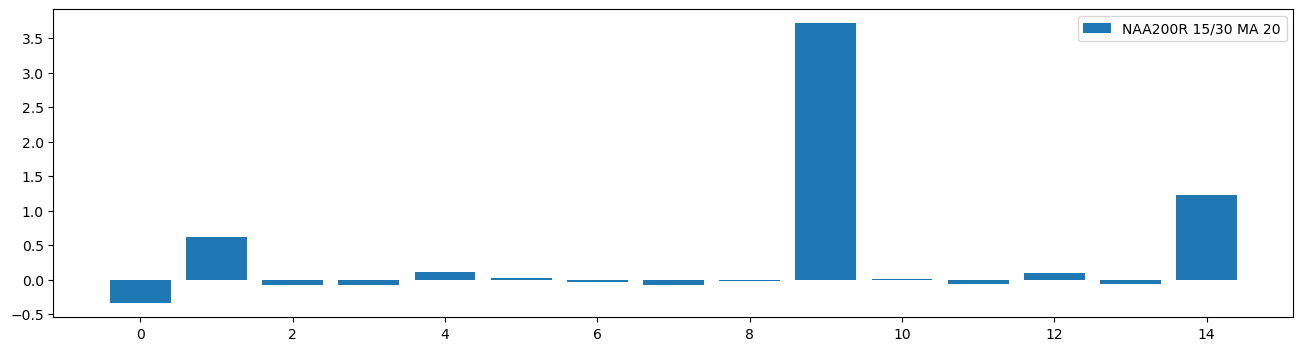

In [15]:
naa200r_bt_daily.plot_records()